In [2]:
import numpy as np

def get_G1():
    matrix = np.zeros((6, 6))

    matrix[:3, :3] = np.random.choice([0, 1], size=(3, 3), p=[0.1, 0.9])
    matrix[3:, :3] = np.random.choice([0, 1], size=(3, 3), p=[0.9, 0.1])
    matrix[:3, 3:] = np.random.choice([0, 1], size=(3, 3), p=[0.9, 0.1])
    matrix[3:, 3:] = np.random.choice([0, 1], size=(3, 3), p=[0.8, 0.2])
    return matrix

def get_G2():
    matrix = np.zeros((6, 6))

    matrix[:3, :3] = np.random.choice([0, 1], size=(3, 3), p=[0.1, 0.9])
    matrix[3:, :3] = np.random.choice([0, 1], size=(3, 3), p=[0.9, 0.1])
    matrix[:3, 3:] = np.random.choice([0, 1], size=(3, 3), p=[0.9, 0.1])
    matrix[3:, 3:] = np.random.choice([0, 1], size=(3, 3), p=[0.2, 0.8])
    return matrix

In [19]:
G1 = get_G1()
graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

_, s, _ = np.linalg.svd(graph_laplacian1)
singular_vector = s.flatten()
singular_vector = singular_vector / np.linalg.norm(singular_vector)

context_matrix = singular_vector.reshape(-1, 1)

for _ in range(24):
    if context_matrix.shape[1] >= 5:
        context_matrix = context_matrix[:, -5:]
    u, s, _ = np.linalg.svd(context_matrix)
    max_sv_index = np.argmax(s)
    max_left_singular_vector = u[:, max_sv_index]
    # print("abs:", np.linalg.norm(max_left_singular_vector))

    G1 = get_G1()
    graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

    _, s, _ = np.linalg.svd(graph_laplacian1)
    singular_vector = s.flatten()
    singular_vector = singular_vector / np.linalg.norm(singular_vector)

    score = 1 - np.dot(max_left_singular_vector, singular_vector)
    print("score: ", score)

    context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])

for _ in range(25):
    if context_matrix.shape[1] >= 5:
        context_matrix = context_matrix[:, -5:]
    u, s, _ = np.linalg.svd(context_matrix)
    max_sv_index = np.argmax(s)
    max_left_singular_vector = u[:, max_sv_index]
    # print("abs:", np.linalg.norm(max_left_singular_vector))

    G2 = get_G2()
    graph_laplacian2 = np.diag(np.sum(G2, axis=1)) - G2

    _, s, _ = np.linalg.svd(graph_laplacian2)
    singular_vector = s.flatten()
    singular_vector = singular_vector / np.linalg.norm(singular_vector)

    score = 1 - np.dot(max_left_singular_vector, singular_vector)
    print("score: ", score)

    context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])

score:  0.02367939681300868
score:  1.986658023828484
score:  1.979337060330422
score:  1.9972054871299805
score:  1.9784687892312816
score:  1.9525067564507366
score:  1.9866562859914991
score:  1.9440830919063807
score:  1.9820051366975853
score:  1.980764083385704
score:  1.9914764527394897
score:  1.9648413453136853
score:  1.9821087465387282
score:  1.9899711702519307
score:  1.9868648350027938
score:  1.9863774546408712
score:  1.9664218835073726
score:  1.9265008812814686
score:  1.9962102150777052
score:  1.995676344194941
score:  1.9861617669489495
score:  1.974301286148584
score:  1.974913394125244
score:  1.973750523857959
score:  1.9586745305985813
score:  1.9627819449574035
score:  1.9903160801886182
score:  1.988847877101016
score:  1.9969949156338052
score:  1.984245711123449
score:  1.9872436163466496
score:  1.9952455728725678
score:  1.9957399113921692
score:  1.9994163824444622
score:  1.9938602749137737
score:  1.9982894590971316
score:  1.992933620395581
score:  1.

(6, 25)

In [56]:
G1 = get_G1()
graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1
G1

array([[1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [57]:
_, s, _ = np.linalg.svd(graph_laplacian1)
print(s)
# print(s.flatten())
singular_vector = s.flatten()
singular_vector = singular_vector / np.linalg.norm(singular_vector)

context_matrix = singular_vector.reshape(-1, 1)
context_matrix

[3.10576099e+00 2.08668366e+00 1.41421356e+00 9.32773914e-17
 0.00000000e+00 0.00000000e+00]


array([[7.76440247e-01],
       [5.21670915e-01],
       [3.53553391e-01],
       [2.33193479e-17],
       [0.00000000e+00],
       [0.00000000e+00]])

In [58]:
u, s, _ = np.linalg.svd(context_matrix)
max_sv_index = np.argmax(s)
max_left_singular_vector = u[:, max_sv_index]
max_left_singular_vector

array([7.76440247e-01, 5.21670915e-01, 3.53553391e-01, 2.33193479e-17,
       0.00000000e+00, 0.00000000e+00])

In [61]:
# G1 = get_G1()
# graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

_, s, _ = np.linalg.svd(graph_laplacian1)
print(s)
singular_vector = s.flatten()
singular_vector = singular_vector / np.linalg.norm(singular_vector)

score = 1 - np.dot(max_left_singular_vector, singular_vector)
print("score: ", score)

context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])
context_matrix

[3.10576099e+00 2.08668366e+00 1.41421356e+00 9.32773914e-17
 0.00000000e+00 0.00000000e+00]
score:  1.1102230246251565e-16


array([[7.76440247e-01, 7.76440247e-01, 7.76440247e-01, 7.76440247e-01],
       [5.21670915e-01, 5.21670915e-01, 5.21670915e-01, 5.21670915e-01],
       [3.53553391e-01, 3.53553391e-01, 3.53553391e-01, 3.53553391e-01],
       [2.33193479e-17, 2.33193479e-17, 2.33193479e-17, 2.33193479e-17],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [62]:
u, s, _ = np.linalg.svd(context_matrix)
max_sv_index = np.argmax(s)
max_left_singular_vector = u[:, max_sv_index]
max_left_singular_vector

array([-7.76440247e-01, -5.21670915e-01, -3.53553391e-01, -2.33193479e-17,
        0.00000000e+00,  0.00000000e+00])

In [30]:
s

array([1.40393468, 0.17019818])

In [32]:
singular_vector

array([0.7022031 , 0.58617554, 0.34260894, 0.15380924, 0.14923429,
       0.        ])

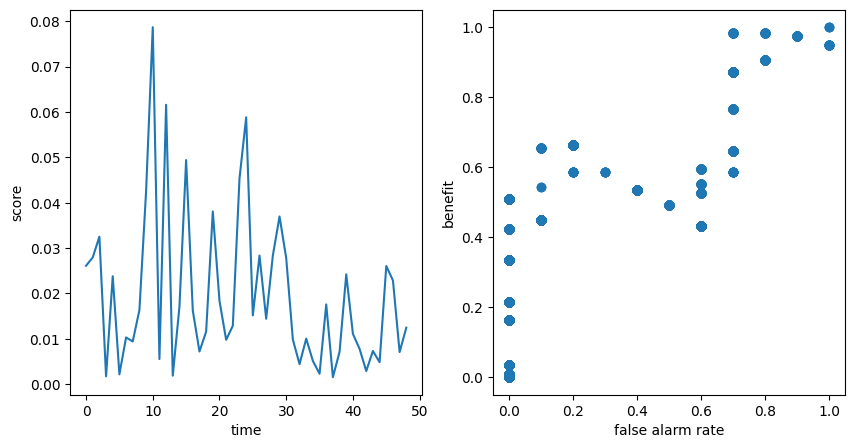

In [134]:
import numpy as np
import matplotlib.pyplot as plt

WINDOW_SIZE = 15
TORRANCE = 15

G1 = get_G1()
graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

_, s, _ = np.linalg.svd(graph_laplacian1)
singular_vector = s.flatten()
singular_vector = singular_vector / np.linalg.norm(singular_vector)

context_matrix = singular_vector.reshape(-1, 1)

score_history = []
graph_history = [G1]

for _ in range(24):
    if context_matrix.shape[1] >= WINDOW_SIZE:
        context_matrix = context_matrix[:, -WINDOW_SIZE:]
    u, s, _ = np.linalg.svd(context_matrix)
    max_sv_index = np.argmax(s)
    max_left_singular_vector = u[:, 0]

    G1 = get_G1()
    graph_history.append(G1)
    graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

    _, s, _ = np.linalg.svd(graph_laplacian1)
    singular_vector = s.flatten()
    singular_vector = singular_vector / np.linalg.norm(singular_vector)

    similarity = np.dot(max_left_singular_vector, singular_vector)
    if similarity < 0:
        similarity = -similarity
    score = 1 - similarity

    # print("score: ", score)
    score_history.append(score)

    context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])


for _ in range(25):
    if context_matrix.shape[1] >= WINDOW_SIZE:
        context_matrix = context_matrix[:, -WINDOW_SIZE:]
    u, s, _ = np.linalg.svd(context_matrix)
    max_sv_index = np.argmax(s)
    max_left_singular_vector = u[:, max_sv_index]

    G2 = get_G2()
    graph_history.append(G2)
    graph_laplacian2 = np.diag(np.sum(G2, axis=1)) - G2

    _, s, _ = np.linalg.svd(graph_laplacian2)
    singular_vector = s.flatten()
    singular_vector = singular_vector / np.linalg.norm(singular_vector)

    similarity = np.dot(max_left_singular_vector, singular_vector)
    if similarity < 0:
        similarity = -similarity
    score = 1 - similarity

    # print("score: ", score)
    score_history.append(score)

    context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(score_history)
axes[0].set_xlabel("time")
axes[0].set_ylabel("score")
# score_history には 0~48
# 0~23: G1
# 24~48: G2
# 24が異常値


b_delta_list = []
f_delta_list = []
for delta in np.arange(0.01, 1, 0.00001):
    total_benefit = 0
    false_count = 0
    for i in range(len(score_history)):
        if score_history[i] > delta:
            benefit = 1 - abs(i - 24) / TORRANCE
            total_benefit += benefit
            if abs(i - 24) > TORRANCE:
                false_count += 1

    b_delta_list.append(total_benefit)
    f_delta_list.append(false_count)

axes[1].scatter(np.array(f_delta_list) / max(f_delta_list), np.array(b_delta_list) / max(b_delta_list))
axes[1].set_xlabel("false alarm rate")
axes[1].set_ylabel("benefit")

fig.savefig('result.png')

In [83]:
len(score_history)

49

/var/folders/_3/hg5n73ns1z151s3fq8tzqtvm0000gn/T/ipykernel_14791/1293718196.py:100: RuntimeWarning: divide by zero encountered in divide
  axes[1].scatter(np.array(b_delta_list) / max(b_delta_list), np.array(f_delta_list) / max(f_delta_list))
/var/folders/_3/hg5n73ns1z151s3fq8tzqtvm0000gn/T/ipykernel_14791/1293718196.py:100: RuntimeWarning: invalid value encountered in divide
  axes[1].scatter(np.array(b_delta_list) / max(b_delta_list), np.array(f_delta_list) / max(f_delta_list))


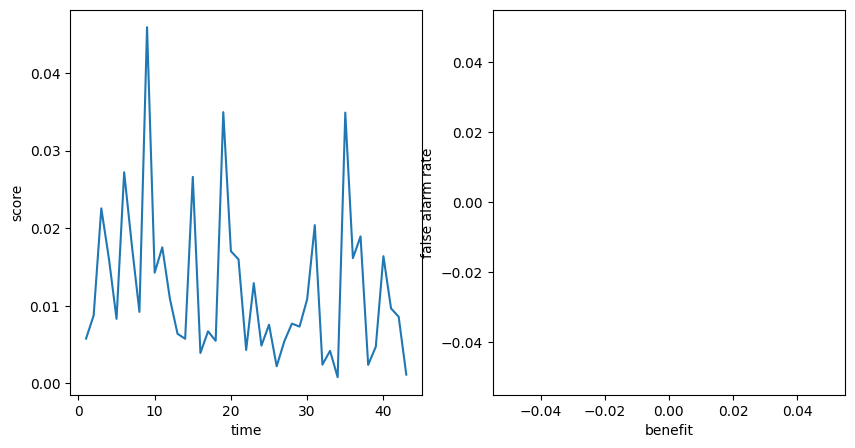

In [6]:
import numpy as np
import matplotlib.pyplot as plt

WINDOW_SIZE = 5
TORRANCE = 15

G1 = get_G1()
graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

_, s, _ = np.linalg.svd(graph_laplacian1)
singular_vector = s.flatten()
singular_vector = singular_vector / np.linalg.norm(singular_vector)

context_matrix = singular_vector.reshape(-1, 1)

score_history = []
phase_history = []
graph_history = [G1]

for i in range(24):
    if context_matrix.shape[1] >= WINDOW_SIZE:
        context_matrix = context_matrix[:, -WINDOW_SIZE:]
    u, s, _ = np.linalg.svd(context_matrix)
    max_sv_index = np.argmax(s)
    max_left_singular_vector = u[:, 0]

    G1 = get_G1()
    graph_history.append(G1)
    graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

    _, s, _ = np.linalg.svd(graph_laplacian1)
    singular_vector = s.flatten()
    singular_vector = singular_vector / np.linalg.norm(singular_vector)

    similarity = np.dot(max_left_singular_vector, singular_vector)
    if similarity < 0:
        similarity = -similarity
    score = 1 - similarity

    # print("score: ", score)
    if i >  WINDOW_SIZE:
        score_history.append(score)
        phase_history.append(1)

    context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])


for _ in range(25):
    if context_matrix.shape[1] >= WINDOW_SIZE:
        context_matrix = context_matrix[:, -WINDOW_SIZE:]
    u, s, _ = np.linalg.svd(context_matrix)
    max_sv_index = np.argmax(s)
    max_left_singular_vector = u[:, max_sv_index]

    G2 = get_G2()
    graph_history.append(G2)
    graph_laplacian2 = np.diag(np.sum(G2, axis=1)) - G2

    _, s, _ = np.linalg.svd(graph_laplacian2)
    singular_vector = s.flatten()
    singular_vector = singular_vector / np.linalg.norm(singular_vector)

    similarity = np.dot(max_left_singular_vector, singular_vector)
    if similarity < 0:
        similarity = -similarity
    score = 1 - similarity

    # print("score: ", score)
    score_history.append(score)
    phase_history.append(2)

    context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot([idx for idx in range(1, len(score_history)+1, 1)], score_history)
axes[0].set_xlabel("time")
axes[0].set_ylabel("score")
# 最初の 10 個分は何もしない
# score_history には 0~39
# 0~23: G1
# 24~48: G2
# 24が異常値


b_delta_list = []
f_delta_list = []
for delta in np.arange(0.01, 1, 0.00001):
    total_benefit = 0
    false_count = 0
    for i in range(len(score_history)):
        if score_history[i] > delta:
            benefit = 1 - abs(i - 24) / TORRANCE
            total_benefit += benefit
            if abs(i - 24) > TORRANCE:
                false_count += 1

    b_delta_list.append(total_benefit)
    f_delta_list.append(false_count)

axes[1].scatter(np.array(b_delta_list) / max(b_delta_list), np.array(f_delta_list) / max(f_delta_list))
axes[1].set_xlabel("benefit")
axes[1].set_ylabel("false alarm rate")

# 保存用
fig.savefig(f'tt_result_case{np.random.randint(10000)}.png')

In [7]:
b_delta_list

[-3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.4000000000000004,
 -3.400000

In [131]:
from pprint import pprint
pprint(np.array([score_history, phase_history]))

array([[3.07241643e-03, 8.64827720e-03, 1.57065836e-02, 5.29288692e-03,
        8.00880346e-02, 6.01900205e-02, 2.42002515e-02, 2.93114425e-03,
        3.69011364e-02, 1.70205307e-02, 2.26346617e-02, 3.62059672e-02,
        2.11894580e-03, 2.91743382e-02, 6.06247504e-03, 2.75283996e-02,
        1.71088246e-02, 3.31081409e-02, 1.07563540e-02, 6.39902293e-03,
        2.88342327e-02, 1.37889710e-02, 3.28779417e-02, 1.16600568e-02,
        7.06750512e-03, 7.37096458e-03, 5.62599731e-03, 9.07153729e-03,
        1.10256671e-02, 2.69789986e-03, 5.36094827e-03, 7.81832782e-03,
        4.45360321e-02, 4.44522592e-04, 1.23511550e-02, 4.92701365e-03,
        7.66447965e-03, 3.98489149e-03, 9.34284283e-03, 2.34003785e-03,
        2.88547167e-02, 8.72870880e-04, 1.05685368e-02, 1.38358199e-02,
        1.01841371e-02],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00,

In [132]:
graph_history[3]

array([[1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.]])

In [133]:
graph_history[4]

array([[1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]])